<a href="https://colab.research.google.com/github/Dij-dom/BreastCancerPredictionModel/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to handle warning messages that may be generated during the execution of a program. Warnings are typically used to indicate potential issues or problems in the code that may not necessarily cause immediate errors but could lead to unexpected behavior or errors in the future.
import warnings
warnings.filterwarnings('ignore')

Load the data

In [ ]:
#read_csv is a function under pandas library
#The result is stored in  a data frame. ( a two-dimensional tabular data structure that organizes data in rows and columns.)
df = pd.read_csv("data.csv")

FileNotFoundError: ignored

In [ ]:
#head() retrieve the first 5 entries in a dataframe
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
#tail() retrieve the last 5 entries in a dataframe
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [ ]:
df.shape
#There are 569 rows and 33 columns in our dataframe

(569, 33)

Description of data in the data frame

In [ ]:
df.describe().T
#describe function:: The describe() function is a powerful method provided by pandas that provides a summary of descriptive statistics for numerical columns in a DataFrame. It computes various statistics for each numeric column(radius), such as count, mean, standard deviation, minimum, quartiles, and maximum values. It offers a quick and informative overview of the distribution and central tendencies of the data.
#doing describe.T will give the attributes such as count, mean, median etc.. as column names.

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

To display all the unique elements in a attribute

In [ ]:
df.diagnosis.unique()
# used to retrieve the unique values from the 'diagnosis' column of a DataFrame named df.

array(['M', 'B'], dtype=object)

In [ ]:
#value_counts():: used to calculate the frequency of each unique value in the 'diagnosis' column of a DataFrame df
df['diagnosis'].value_counts()
#here we get 357 begign cases and 212 malignant cases.

B    357
M    212
Name: diagnosis, dtype: int64

Plotting graph for Benign and Malignant using Matplotlib

In [ ]:
# plt.plot(df['diagnosis'], label='Diagnosis Result')
# plt.plot(df1['count'], label='Frequency')

# plt.xlabel('Diagnosis Result')
# plt.ylabel('Frequency')
# # plt.legend()

# plt.show()

Plotting graph for Benign and Malignant

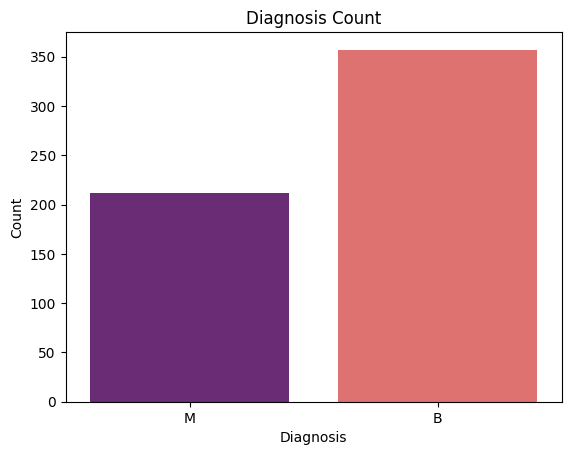

In [ ]:
sns.countplot(data=df, x='diagnosis', palette='magma')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Count')
plt.show()


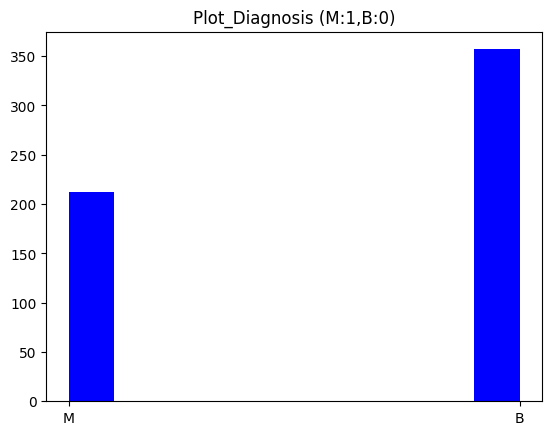

In [ ]:
plt.hist(data = df,x = 'diagnosis',color='b')
plt.title('Plot_Diagnosis (M:1,B:0)')
plt.show()

Cleaning and Preparing data for applying algorithms

Dropping the columns 'id' and 'unnamed32'

In [ ]:
df.drop('id', axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace= True)
#The axis=1 parameter specifies that the column should be dropped, and inplace=True ensures that the changes are made directly to the DataFrame df without creating a new DataFrame.

In [ ]:
df.head()
#retrieves the first 5 rows of the dataframe

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Changing 'M'and 'B' to numeric values 0 and 1 for applying algorithm using map function

In [ ]:
#mapping the values in the 'diagnosis' column of the DataFrame df to numerical values using a dictionary. It assigns the value 1 to 'M' (indicating malignant) and the value 0 to 'B' (indicating benign).
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()
df.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 31 columns]

In [ ]:
df.isnull().sum()
#used to check the number of missing values (null values) in each column of the DataFrame df.No null values then we are good to go ahead.

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

As there are no null values we need not replace anything

In [ ]:
df.corr()
#calculates the correlation between columns in a DataFrame df. It returns a correlation matrix, where each cell represents the correlation coefficient between two columns.

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

**Correlation**: To access the relationship between features or attributes in a dataset.By examining the correlation between features and the target variable(diagnosis), we can identify which attributes are most strongly associated with the diagnosis and potentially use them as important predictors in your machine learning model.

Heatmap for correlation between attributes

<Axes: >

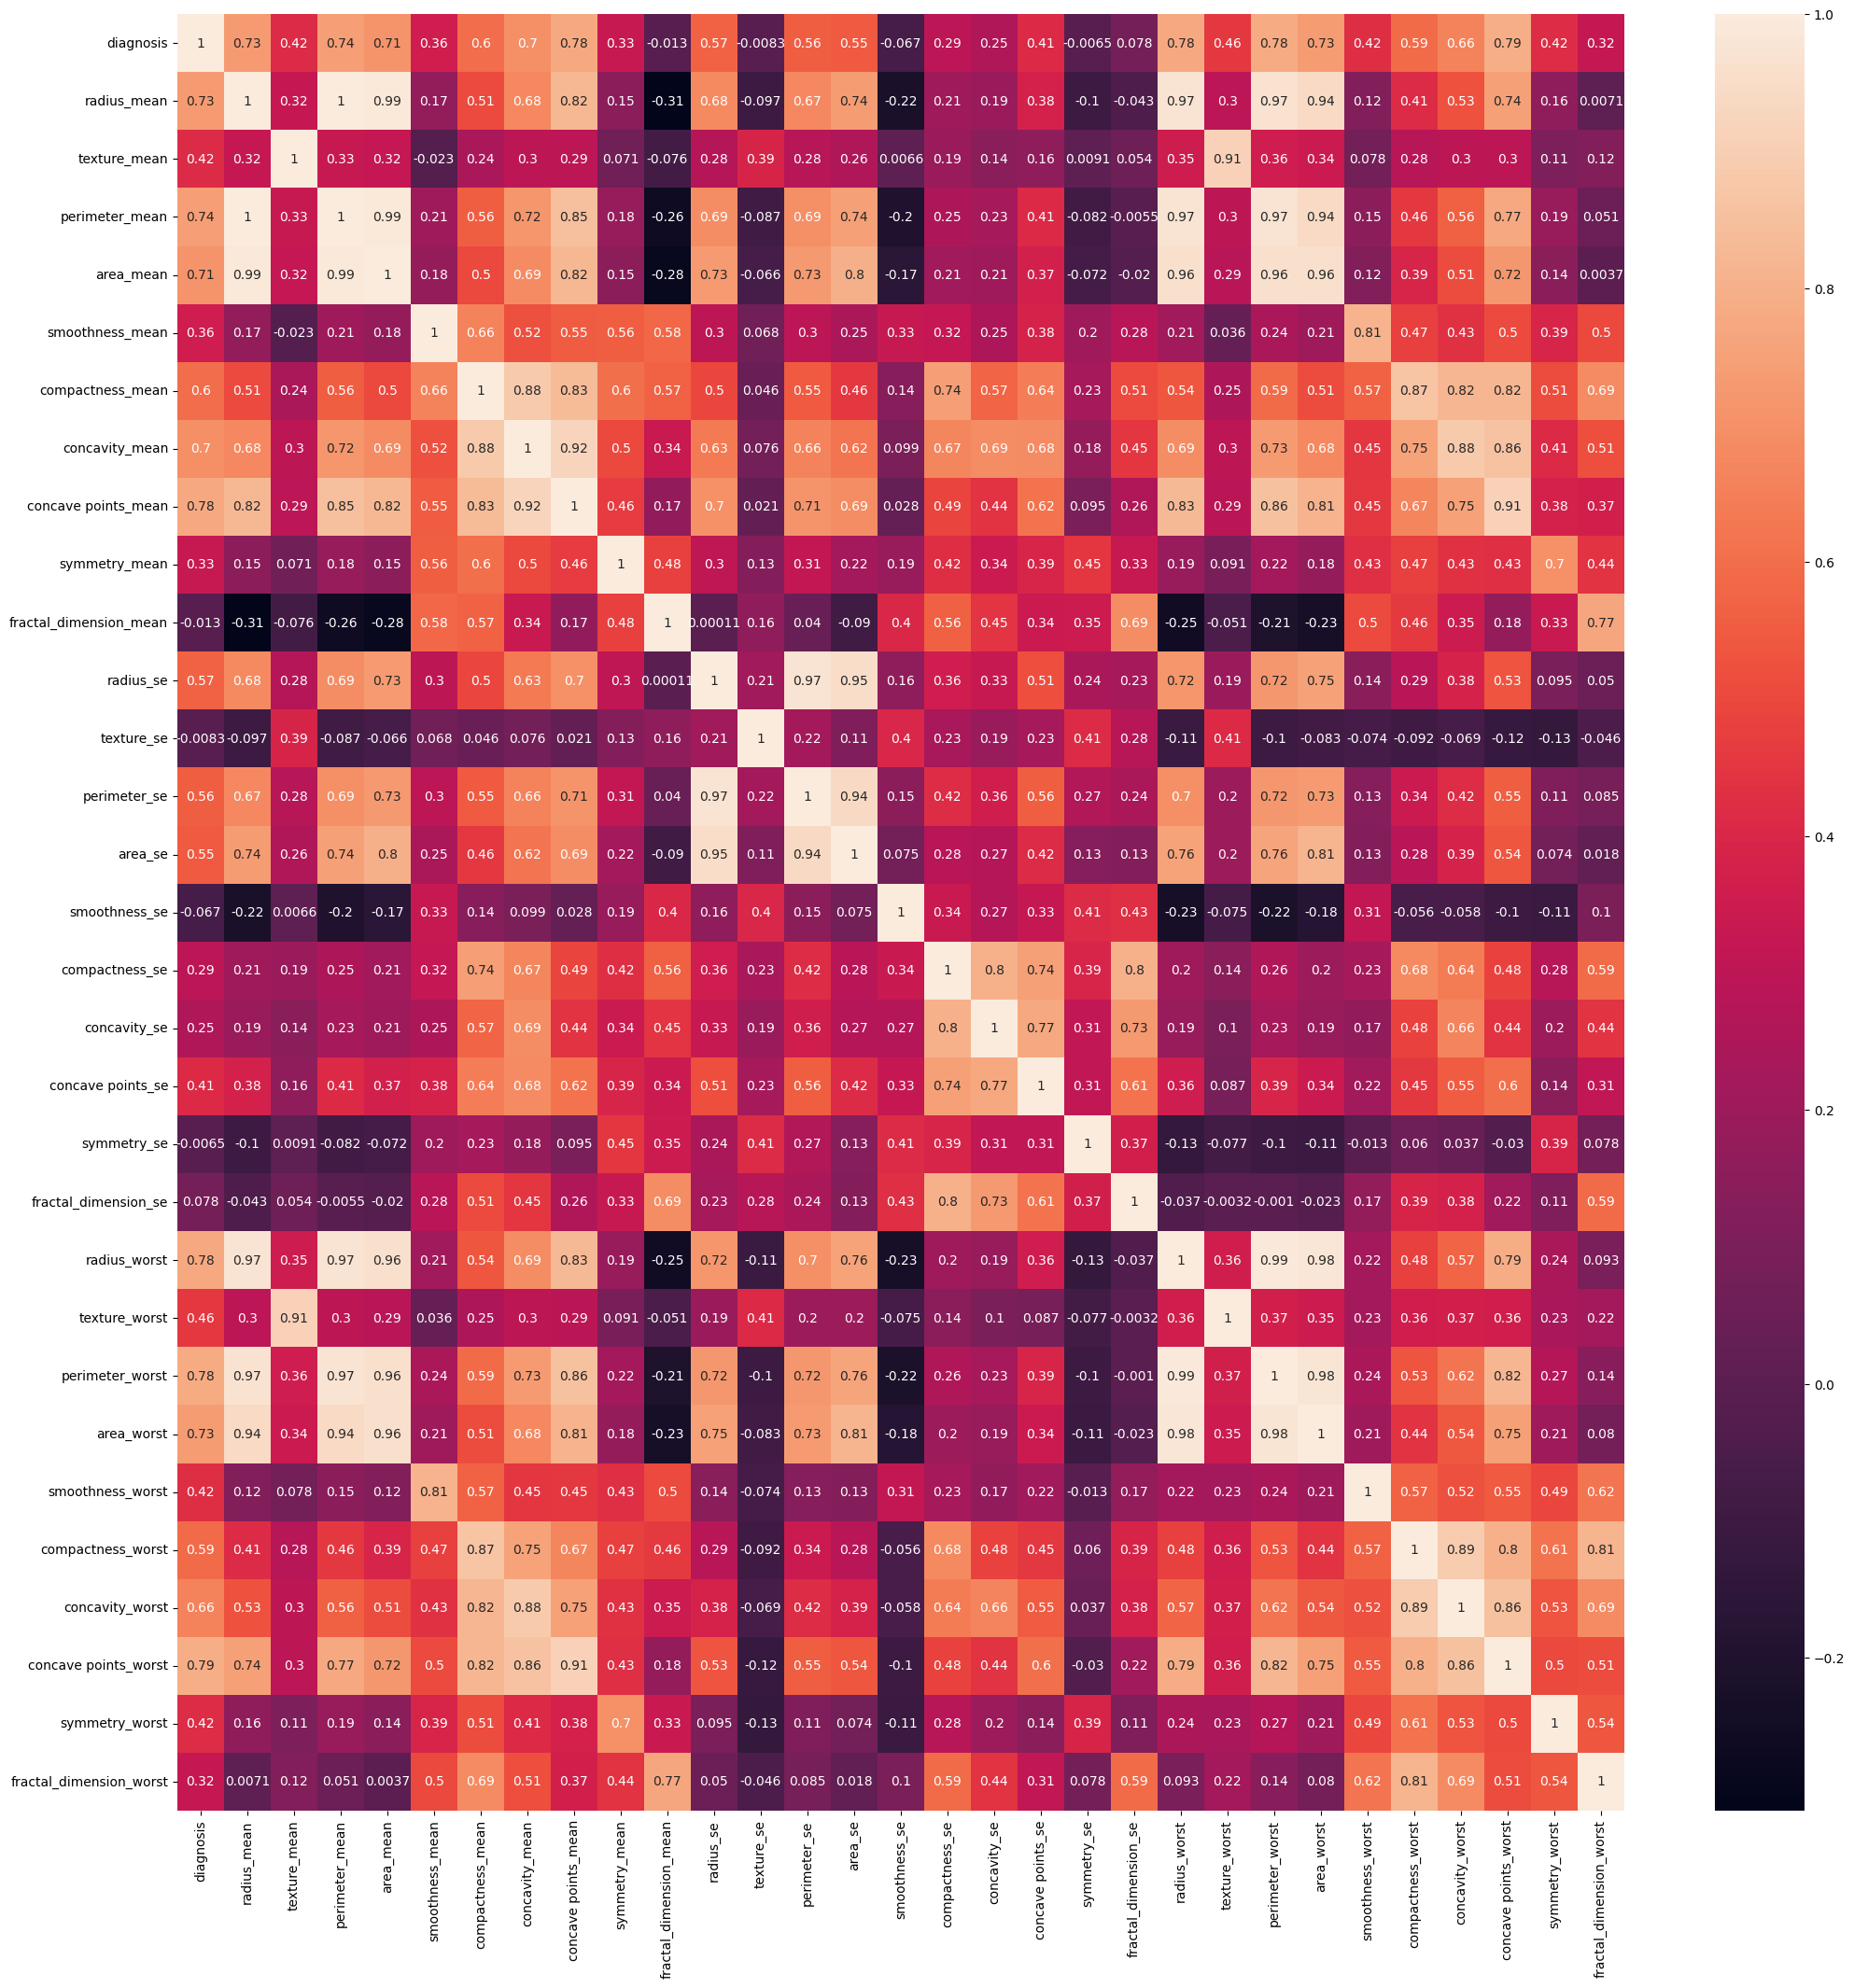

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot= True) #df.corr(): The correlation matrix to be visualized # annot=True: If set to True, the correlation values will be annotated in each cell of the heatmap.

Generate a scatter plot matrix with the 'mean' column

(569, 11)

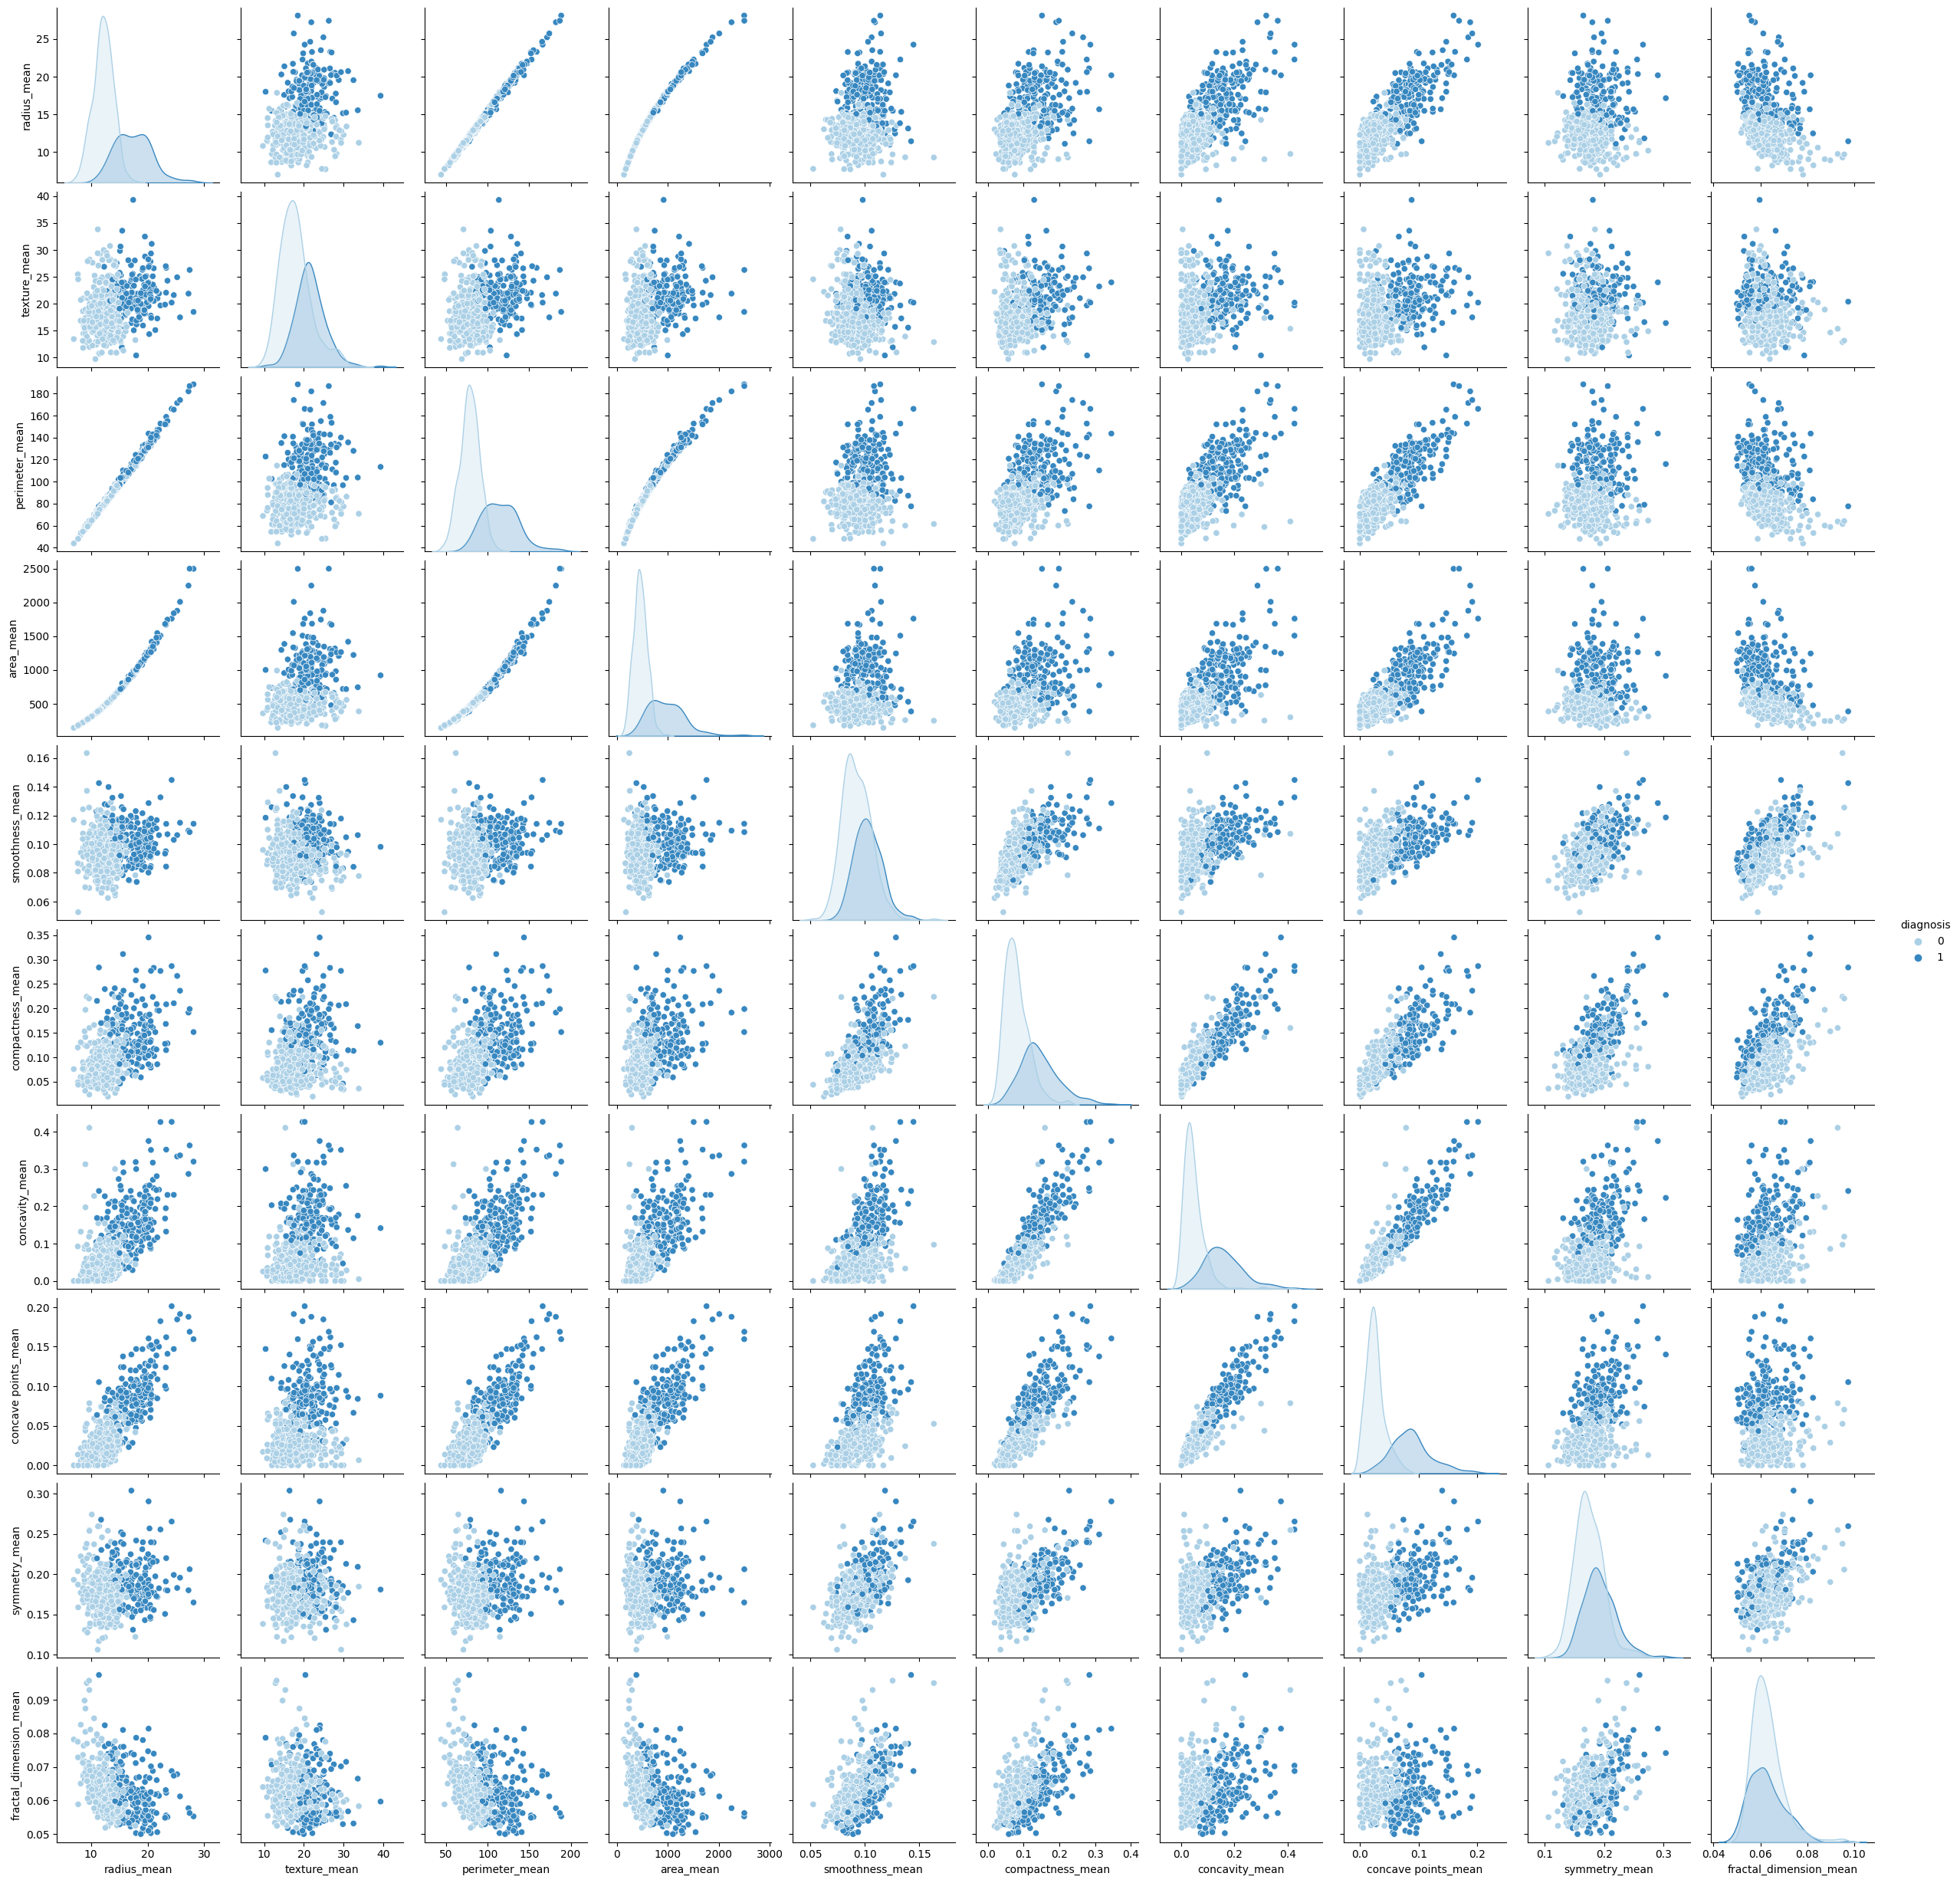

In [ ]:
col = ["diagnosis",
      'radius_mean',
      'texture_mean',
      'perimeter_mean',
      'area_mean',
      'smoothness_mean',
      'compactness_mean',
      'concavity_mean',
      'concave points_mean',
      'symmetry_mean',
      'fractal_dimension_mean']
sns.pairplot(data=df[col], hue = "diagnosis", palette= "Blues")
df[col].shape

Almost perfectly linear pattern between raduis, perimeter and area attributes are hinting the presence of multicolinearity between these variables or attributes.
Another set of attrubutes that possibly imply multicolinearity are the concavity, concave points and compactness.

# How do we remove this multicollinearity?
We solve this problem by removing the highly coorelated predictors from the model.


In [ ]:
#Generating and Visualizing correlation matrix
corr = df.corr().round(2)
corr


diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                     1.00         0.73          0.42            0.74   
radius_mean                   0.73         1.00          0.32            1.00   
texture_mean                  0.42         0.32          1.00            0.33   
perimeter_mean                0.74         1.00          0.33            1.00   
area_mean                     0.71         0.99          0.32            0.99   
smoothness_mean               0.36         0.17         -0.02            0.21   
compactness_mean              0.60         0.51          0.24            0.56   
concavity_mean                0.70         0.68          0.30            0.72   
concave points_mean           0.78         0.82          0.29            0.85   
symmetry_mean                 0.33         0.15          0.07            0.18   
fractal_dimension_mean       -0.01        -0.31         -0.08           -0.26   
radius_se                     0.57         0.68          0.28            0.69   
texture_se                   -0.01        -0.10          0.39           -0.09   
perimeter_se                  0.56         0.67          0.28            0.69   
area_se                       0.55         0.74          0.26            0.74   
smoothness_se                -0.07        -0.22          0.01           -0.20   
compactness_se                0.29         0.21          0.19            0.25   
concavity_se                  0.25         0.19          0.14            0.23   
concave points_se             0.41         0.38          0.16            0.41   
symmetry_se                  -0.01        -0.10          0.01           -0.08   
fractal_dimension_se          0.08        -0.04          0.05           -0.01   
radius_worst                  0.78         0.97          0.35            0.97   
texture_worst                 0.46         0.30          0.91            0.30   
perimeter_worst               0.78         0.97          0.36            0.97   
area_worst                    0.73         0.94          0.34            0.94   
smoothness_worst              0.42         0.12          0.08            0.15   
compactness_worst             0.59         0.41          0.28            0.46   
concavity_worst               0.66         0.53          0.30            0.56   
concave points_worst          0.79         0.74          0.30            0.77   
symmetry_worst                0.42         0.16          0.11            0.19   
fractal_dimension_worst       0.32         0.01          0.12            0.05   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                     0.71             0.36              0.60   
radius_mean                   0.99             0.17              0.51   
texture_mean                  0.32            -0.02              0.24   
perimeter_mean                0.99             0.21              0.56   
area_mean                     1.00             0.18              0.50   
smoothness_mean               0.18             1.00              0.66   
compactness_mean              0.50             0.66              1.00   
concavity_mean                0.69             0.52              0.88   
concave points_mean           0.82             0.55              0.83   
symmetry_mean                 0.15             0.56              0.60   
fractal_dimension_mean       -0.28             0.58              0.57   
radius_se                     0.73             0.30              0.50   
texture_se                   -0.07             0.07              0.05   
perimeter_se                  0.73             0.30              0.55   
area_se                       0.80             0.25              0.46   
smoothness_se                -0.17             0.33              0.14   
compactness_se                0.21             0.32              0.74   
concavity_se                  0.21             0.25              0.57   
concave points_se             0.37           

In [ ]:

# corr = df.corr().round(2)
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)]= True
# f, ax = plt.subplots(figsize=(20,20))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(corr,mask=mask, cmap = cmap, vmin = -1, vmax = 1,center = 0,square = True, linewidths = .5,cbar_kws={"shrink":.5}, annot = True)
# plt.tight_layout()

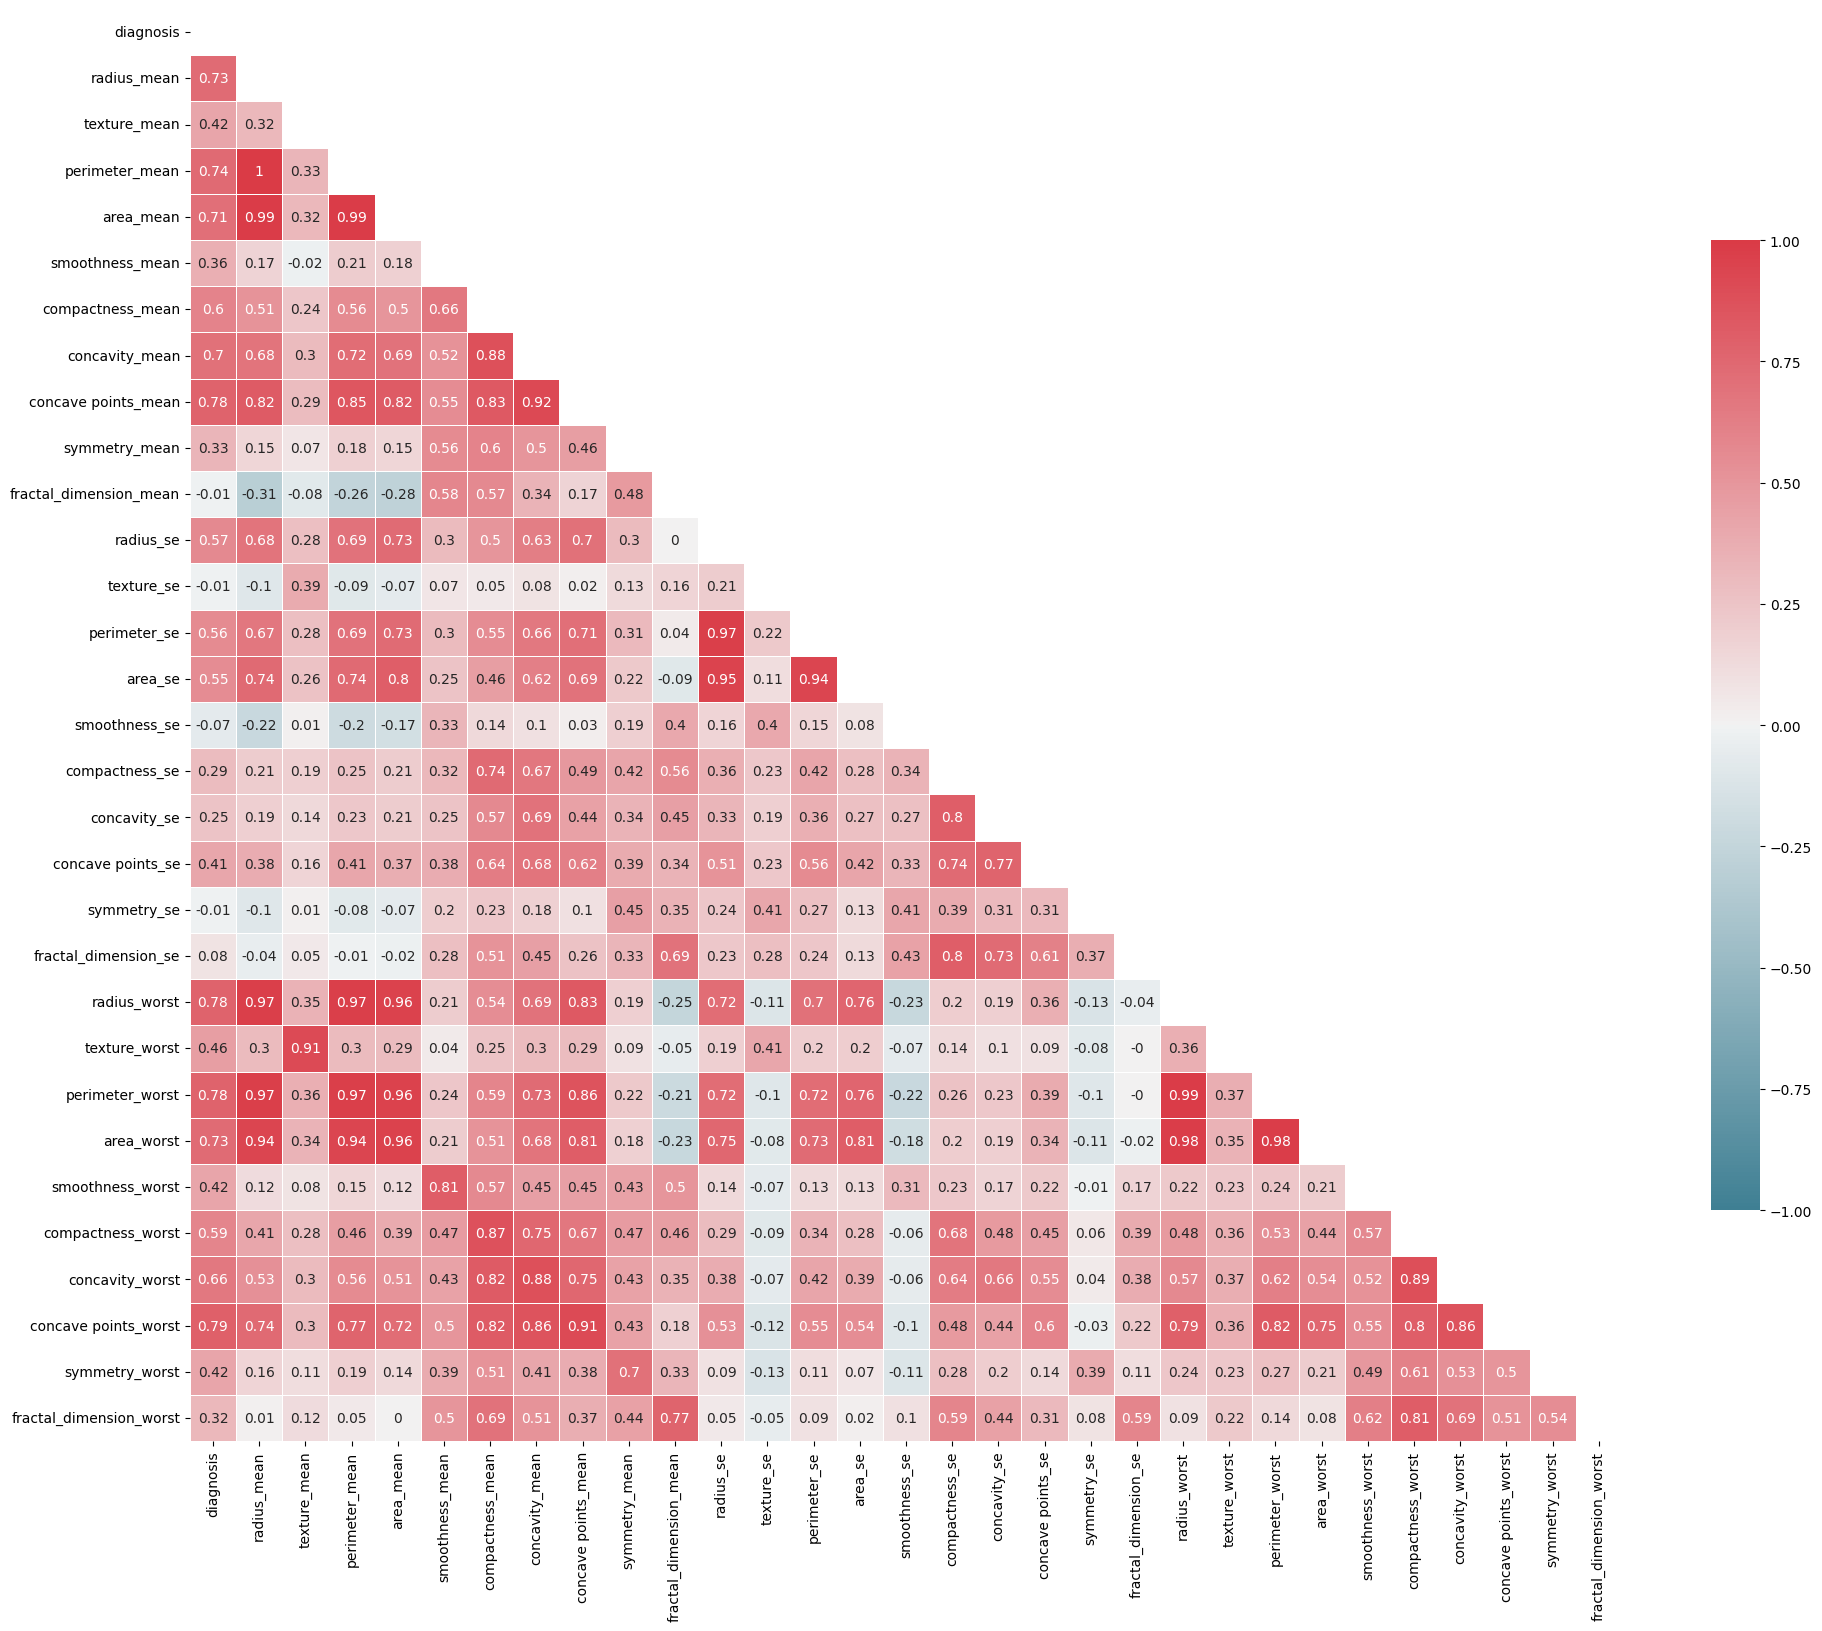

In [ ]:
#Mask matrix for upper triangle(to hide the upper triangular part)
#The mask matrix is a square matrix of the same size as the correlation matrix, where the upper triangular part is set to True and the lower triangular part is set to False.
mask = np.zeros_like(corr, dtype=np.bool) #creates a matrix of the same shape as corr filled with zeros and with a boolean data type
mask[np.triu_indices_from(mask)]= True #np.triu_indices_from(mask) returns the indices for the upper triangular part of the mask matrix. np.triu_indices_from() is a NumPy function that generates indices for the upper triangular portion of a matrix. By assigning True to these indices in the mask matrix, we set the values in the upper triangular part of the matrix to True.
#Set figure size
f, ax = plt.subplots(figsize=(20,20)) # creates a figure object (f) and an axis object (ax) with a specified size of 20x20 inches. The figure and axis objects are used to create the plot.
#Define custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True) # generates a color map that ranges from a light color (220) to a dark color (10) and is specified as a continuous palette using as_cmap=True.
#Draw the heatmap(refer the below text box t know how the code works)
sns.heatmap(corr,mask=mask, cmap = cmap, vmin = -1, vmax = 1,center = 0,square = True, linewidths = .6,cbar_kws={"shrink":.5}, annot = True)
plt.tight_layout()

# ***sns.heatmap()***: This function is used to draw the heatmap. It takes multiple parameters:
1.   **corr**: The correlation matrix to be visualized.
2.   **mask**: The mask matrix to hide the upper triangular part.
3.   **cmap**: The custom color map.
4.   **vmin, vmax**: The minimum and maximum values for the color bar scale.
5.   **center**: The center value of the color bar scale.
6.   **square**: If True, the heatmap will be square-shaped.
7.   **linewidths**: The width of the lines separating the cells.
8.   **cbar_kws**: Additional keyword arguments for the color bar, such as shrinking its size.
9.   **annot**: If True, the correlation values will be annotated in each cell.
10.  plt.tight_layout(): This line ensures that the subplots and their labels are properly arranged within the figure.

In [ ]:
#converting to mask array to mask matrix form so that we can see how the code in line [23] works.
mask_matrix = np.reshape(mask, (31,31))
from sympy import pprint
pprint(mask_matrix)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
                  True  True  True  True  True  True  True]              
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
                  True  True  True  True  True  True  True]              
 [False False  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
                  True  True  True  True  True  True  True]              
 [False False False  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
                  True  True  True  True  True  True  True]              
 [False False False False  True  True  True  True  True  True  True  True
   True  True  True  True  True  True 

Here we can observe that from the code on line [21]--( mask[np.triu_indices_from(mask)]= True )we set the values of the upper triangular matrix to true.

## Why to Drop columns: To avoid multicolinearilty and high/low correlation of features with the target attribute(diagnosis).

1.  High correlation with the target variable: If a feature has a very high correlation coefficient with the target variable (diagnosis), it suggests that the feature is strongly related to the outcome you're trying to predict. In such cases, dropping the feature may lead to a loss of predictive power, so it's typically better to retain it.

2.  High correlation with other features: If two or more features exhibit high correlation among themselves (multicollinearity), it indicates that they provide redundant or similar information. In this case, keeping both features might not provide additional value and can potentially introduce instability or overfitting in your model. You may consider dropping one of the highly correlated features to address multicollinearity.

3.  Weak correlation with the target variable: If a feature has a very low correlation coefficient with the target variable, it implies that the feature has little or no predictive power for the target variable. Dropping such features may help simplify your model and improve interpretability, especially if they do not contribute much to the prediction.

In [ ]:
try:
    #dropping all the worst columns
    cols = ['radius_worst',
          'texture_worst',
          'perimeter_worst',
          'area_worst',
          'smoothness_worst',
          'compactness_worst',
          'concavity_worst',
          'concave points_worst',
          'symmetry_worst',
          'fractal_dimension_worst']
    df= df.drop(cols, axis = 1)
    #dropping all the columns related with perimeter and area attributes.
    col1 = ['perimeter_mean',
           'perimeter_se',
           'area_mean',
            'area_se']
    df = df.drop(col1, axis=1)
    #dropping all the columns related with 'concavity and 'concave points' attributes
    col2 = ['concavity_mean',
            'concavity_se',
            'concave points_mean',
            'concave points_se']
    df = df.drop(col2, axis=1)
except Exception as e:
    pass
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

In [ ]:
df


diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0            1        17.99         10.38          0.11840           0.27760   
1            1        20.57         17.77          0.08474           0.07864   
2            1        19.69         21.25          0.10960           0.15990   
3            1        11.42         20.38          0.14250           0.28390   
4            1        20.29         14.34          0.10030           0.13280   
..         ...          ...           ...              ...               ...   
564          1        21.56         22.39          0.11100           0.11590   
565          1        20.13         28.25          0.09780           0.10340   
566          1        16.60         28.08          0.08455           0.10230   
567          1        20.60         29.33          0.11780           0.27700   
568          0         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0         0.006399         0.04904      0.03003              0.006193  
1         0.005225         0.01308      0.01389              0.003532  
2         0.006150         0.04006      0.02250              0.004571  
3         0.009110         0.07458      0.05963              0.009208  
4         0.011490         0.02461      0.01756              0.005115  
..             ...             ...          ...                   ...  
564       0.010300         0.02891      0.01114              0.004239  
565       0.005769         0.02423      0.01898              0.002498  
566       0.005903         0.03731      0.01318              0.003892  
567       0.006522         0.06158      0.02324              0.006185  
568       0.007189         0.00466      0.02676              0.002783  

[569 rows x 13 columns]

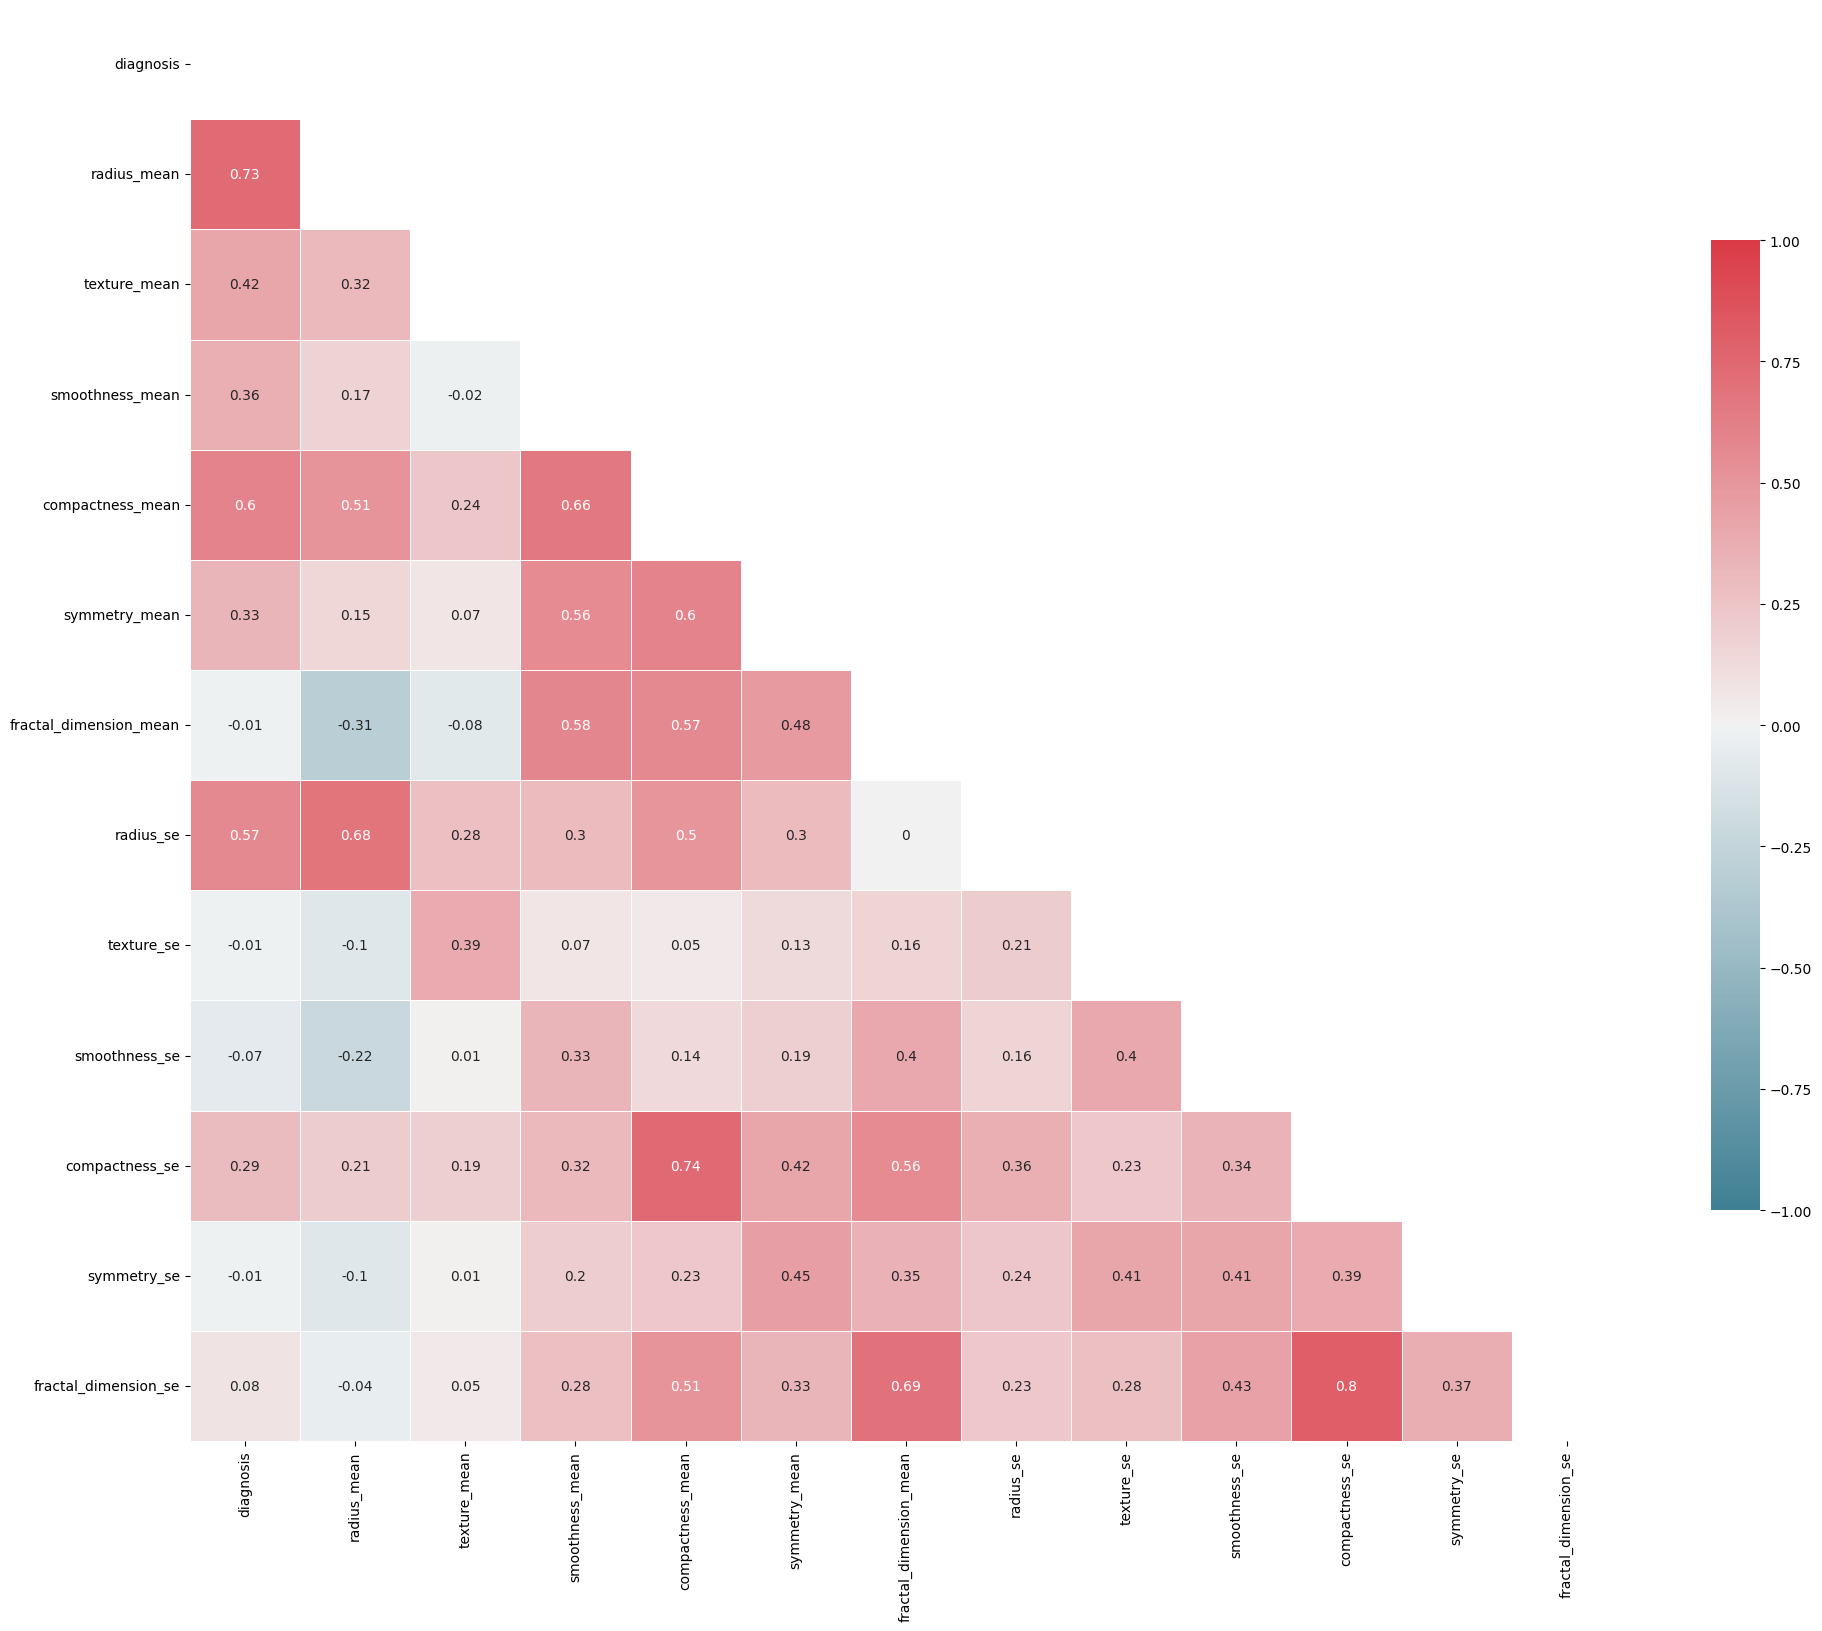

In [ ]:
# To check the multicolineraity using heatmap
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
#Set figure size
f, ax = plt.subplots(figsize=(20,20))
#Define custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap
sns.heatmap(corr,mask=mask, cmap = cmap, vmin = -1, vmax = 1,center = 0,square = True, linewidths = .5,cbar_kws={"shrink":.5}, annot = True)
plt.tight_layout()

#Build Model

In [ ]:
X = df.drop(['diagnosis'],axis =1) #X represents the feature matrix (input variables).
y = df['diagnosis'] # y represents the target variable (output variable or labels).

In [ ]:
from sklearn.model_selection import train_test_split
#rain_test_split function splits the data into training and testing sets, which are assigned to X_train, X_test, y_train, and y_test.

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state =40)
#test size:  specifies the proportion of the dataset that should be allocated for testing. In this example, 0.3 means that 30% of the data will be used for testing, and the remaining 70% will be used for training.

After splitting the data, you can use X_train and y_train for training your machine learning model, and X_test and y_test for evaluating its performance.

#Feature Scaling
By applying feature scaling, specifically standardization, you ensure that the features have similar scales, which can be beneficial for many machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train) #calculates the mean and standard deviation of the training data and then scales the features accordingly.
X_test = ss.fit_transform(X_test) #ensures that the testing data is scaled using the same mean and standard deviation values obtained from the training data

1. StandardScaler is a class that implements the standardization technique. It scales the features to have zero mean and unit variance.
2. ss = StandardScaler() creates an instance(object) of the StandardScaler class.
3. X_train = ss.fit_transform(X_train) applies the fit_transform() method of StandardScaler to the training data (X_train). This step calculates the mean and standard deviation of the training data and then scales the features accordingly.
4. X_test = ss.transform(X_test) uses the transform() method of StandardScaler to standardize the testing data (X_test). Note that we only use the transform() method on the testing data without fitting it again. This ensures that the testing data is scaled using the same mean and standard deviation values obtained from the training data.

Implementing models and finding the best one

## Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression #a class that implements logistic regression, a popular algorithm for binary classification tasks.
lr = LogisticRegression() #creates an instance of the LogisticRegression class

model1 = lr.fit(X_train,y_train) #fits the logistic regression model using the training data X_train (feature matrix) and y_train (target variable or labels). This step estimates the model parameters by minimizing the logistic regression loss function.
prediction1 = model1.predict(X_test) #performs predictions on the test data X_test using the trained logistic regression model. The predicted labels or classes are stored in the prediction1 variable.

In [ ]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix based on the true labels (y_test) and the predicted labels
cm = confusion_matrix(y_test,prediction1) #calculates the confusion matrix based on the true labels (y_test) and the predicted labels (prediction1). The true labels represent the ground truth values of the target variable, while the predicted labels are the model's predictions for the corresponding samples in the test set.
cm

array([[110,   5],
       [  2,  54]])

**The confusion matrix** is a table that summarizes the performance of a classification model by displaying the counts of true positive, true negative, false positive, and false negative predictions.
The resulting confusion matrix (cm) is a NumPy array with dimensions (2, 2) for binary classification problems, where the rows represent the actual classes (e.g., true negatives and true positives) and the columns represent the predicted classes (e.g., false positives and true positives).

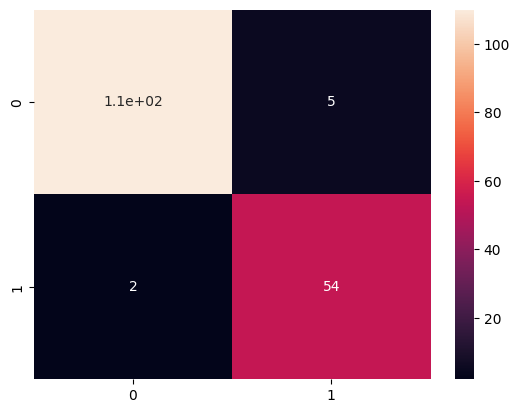

In [ ]:
sns.heatmap(cm, annot=True) # generates the heatmap using the confusion matrix cm. The annot=True parameter ensures that the cell values are displayed in the heatmap.
plt.savefig('h.png') #saves the heatmap as an image file named "h.png" in the current directory.

In [ ]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
AccLogReg =  (TP+TN)/(TP+TN+FN+FP)
print("Testing Accuracy by Logistic Regression algorithm is ",AccLogReg)
#By calculating and analyzing the testing accuracy, you can assess the performance of the logistic regression model in correctly classifying the test samples

Testing Accuracy by Logistic Regression algorithm is  0.9590643274853801


In [ ]:
#another way to calculate the accuracy of a classification model
from sklearn.metrics import accuracy_score #. It compares the true labels (y_test) with the predicted labels (prediction1) and computes the accuracy score.
accuracy_score(y_test,prediction1)

0.9590643274853801

In [ ]:
from sklearn.metrics import classification_report #computes the classification report by comparing the true labels (y_test) with the predicted labels (prediction1).
print(classification_report(y_test,prediction1))# stores the classification report, which is a string representation of the evaluation metrics

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       115
           1       0.92      0.96      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier class from scikit-learn to create a decision tree model for classification.
DTC = DecisionTreeClassifier() # creates an instance of the DecisionTreeClassifier class
model2 = DTC.fit(X_train,y_train) #its the decision tree model using the training data X_train (feature matrix) and y_train (target variable or labels).
prediction2 = model2.predict(X_test) #performs predictions on the test data X_test using the trained decision tree model. The predicted labels or classes are stored in the prediction2 variable.
cm2 = confusion_matrix(y_test,prediction2) #the confusion matrix based on the true labels (y_test) and the predicted labels (prediction2).
cm2

array([[106,   9],
       [  7,  49]])

In [ ]:
accuracy_score(y_test,prediction2)

0.9064327485380117

Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier # class that represents the random forest classifier algorithm in scikit-learn. It combines multiple decision trees to create an ensemble model that improves the overall prediction accuracy.

RFC = RandomForestClassifier()
model3 = DTC.fit(X_train,y_train)
prediction3 = model3.predict(X_test)
cm3 = confusion_matrix(y_test,prediction3)
cm3

array([[106,   9],
       [  6,  50]])

In [ ]:
accuracy_score(y_test,prediction3)

0.9122807017543859

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       115
           1       0.85      0.89      0.87        56

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



K Nearest Neighbour(K NN) <br>
Support Vector Machine<br>
Naive Bayes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #classification algorithm that assigns a label to a data point based on the labels of its neighboring data points
from sklearn.svm import SVC # powerful classifier that uses support vectors to separate different classes. It can handle both linear and non-linear classification problems by using different types of kernels.
from sklearn.naive_bayes import GaussianNB

In [ ]:
models = []
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#Now you have a list called models that contains three models: KNN, GaussianNB, and SVM. Each model is paired with its corresponding classifier instance.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#KFold and cross_val_score from the sklearn.model_selection module. These modules are useful for evaluating the performance of machine learning models and comparing different models using cross-validation.

In [ ]:
#For evaluating each model

results = [] #used to store the accuracy scores obtained from cross-validation for each model.
model_names = [] # used to store the names of the models.
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 40,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train,cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    model_names.append(name)
    msg = '%s:%f, %f)' % (name, cv_results.mean(), cv_results.std()) # meaage has the name of the model, the mean and standard deviation of the accuracy scores.
    #cv_results.mean() is used to calculate the mean of the accuracy scores obtained from cross-validation for a specific model.
    print(msg)

KNN:0.901987, 0.044061)
NB:0.899744, 0.064079)
SVM:0.909615, 0.045167)


Making pediction on test dataset

In [ ]:
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9649122807017544


In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)
predictionsnb = NB.predict(X_test)
print(accuracy_score(y_test, predictionsnb))

0.9298245614035088


In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictionsknn = KNN.predict(X_test)
print(accuracy_score(y_test, predictionsknn))

0.9649122807017544


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
cmSVM = confusion_matrix(y_test, predictions)
cmSVM

array([[112,   3],
       [  3,  53]])

We are getting the accuracy with SVM which is the best that is 96.4%, the model is predicting with 96% accuracy on the test data

In [ ]:
TP = cmSVM[0][0]
FP = cmSVM[0][1]
FN = cmSVM[1][0]
TN = cmSVM[1][1]
AccSVM =  (TP+TN)/(TP+TN+FN+FP)
print("Testing Accuracy by SVM algorithm is ",AccSVM)

Testing Accuracy by SVM algorithm is  0.9649122807017544


SVM and K Nearest Neighbour has the highest prediction accuracy.